In [ ]:
import sys 
sys.path.append('C:/directory/path/downloaded_py_files/')
import GPR_locate_rebars as gpr_lr

In [2]:
# Save DZT into CSV files
downloaded_path = "C:/directory/path/"
df1, df2 = gpr_lr.readdzt(downloaded_path + "Mississippi_bridge_data.DZT")
gpr_lr.save_to_csv(df1, downloaded_path, 'data')
gpr_lr.save_to_csv(df2, downloaded_path, 'config')

In [3]:
# Read saved CSV file
user_directory = 'C:/directory/path/'
df_1, df_2 = gpr_lr.read_csv(user_directory)

In [4]:
# Allocate all the GPR configuration settings as variables in Python
result_variables = gpr_lr.config_to_variable(df_2)
locals().update(result_variables)

In [5]:
# Outlier removal through IQR
IQR_df_1 = gpr_lr.Interquartile_Range(df_1, min_value=0.10, max_value=0.95, multiplier=1.5)

In [6]:
# Split the DataFrame (too long column)
clipped_df_chunk=gpr_lr.data_chunk(IQR_df_1)

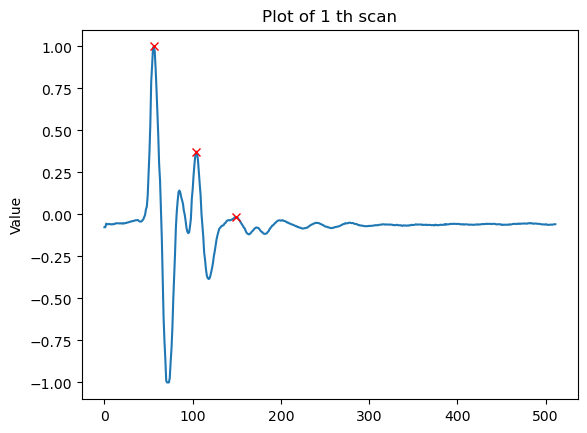

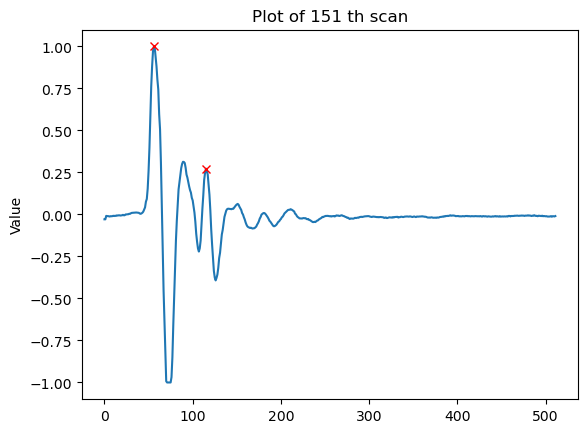

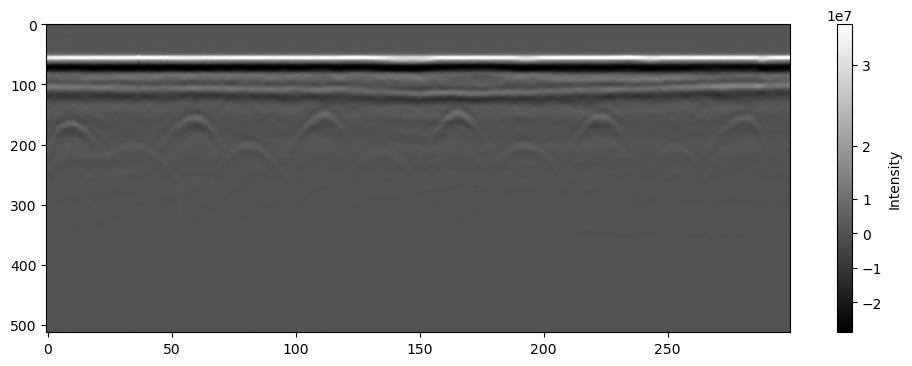

In [7]:
# Plot A-scans and B-scan of the data (Outlier removed & coulmn cut)
gpr_lr.plot.Plot_a_scan(clipped_df_chunk[0])
gpr_lr.plot.Plot_b_scan_advanced(clipped_df_chunk[0], 0.7)

In [8]:
# Apply power gain 
gpr_data_powered = gpr_lr.power_gain_dataframe(clipped_df_chunk[0], type="pow", alpha=0.4, t0=120)

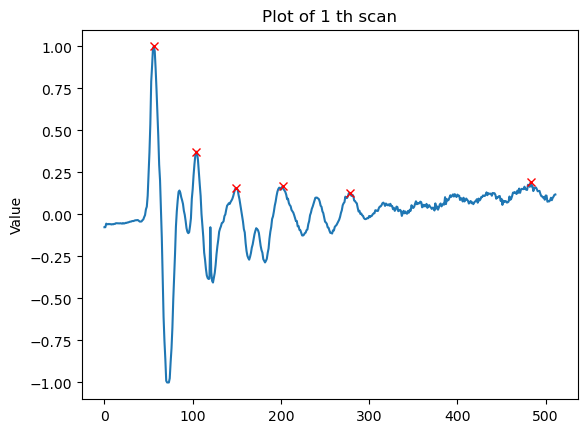

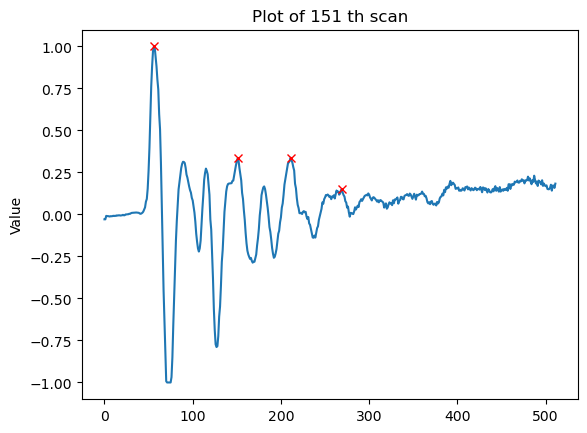

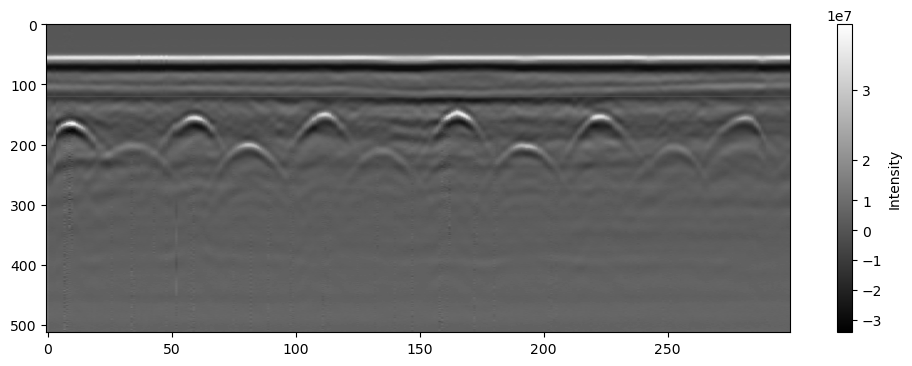

In [9]:
# Plot A-scans and B-scan of the data after gain
gpr_lr.plot.Plot_a_scan(gpr_data_powered)
gpr_lr.plot.Plot_b_scan_advanced(gpr_data_powered, 0.7)

In [10]:
# Apply trinomial dewow function
dewowed_ar = gpr_lr.dewow(gpr_data_powered)

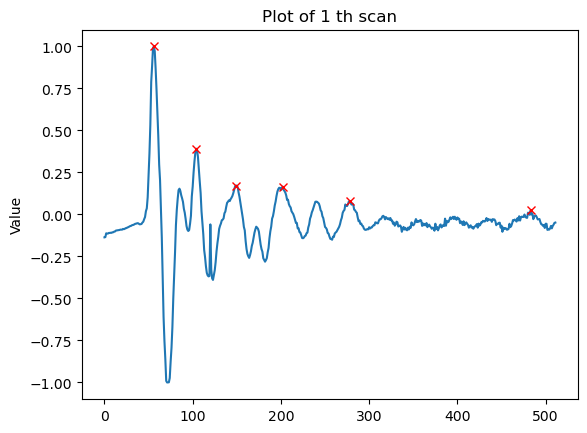

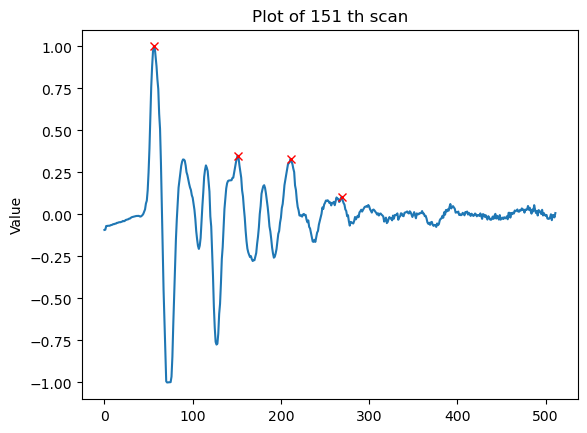

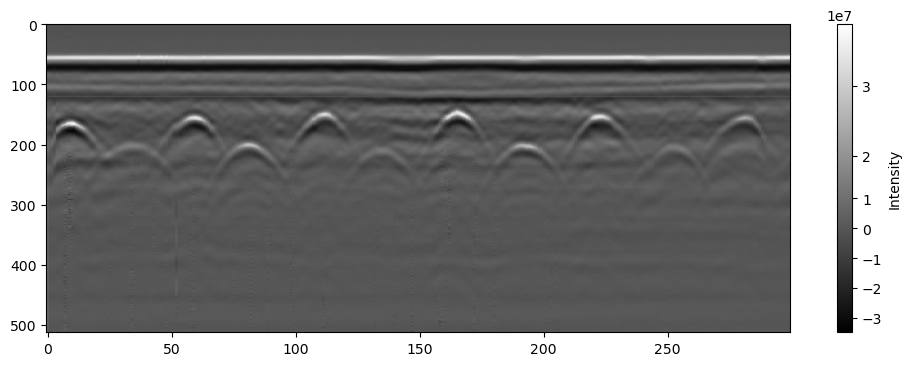

In [11]:
# Plot A-scans and B-scan of the data after dewow
gpr_lr.plot.Plot_a_scan(dewowed_ar)
gpr_lr.plot.Plot_b_scan_advanced(dewowed_ar, 0.7)

In [12]:
# Apply scan-by-scan time-zero correction
time0df, rh_nsamp = gpr_lr.Timezero_individual(dewowed_ar, rhf_position, rhf_range)

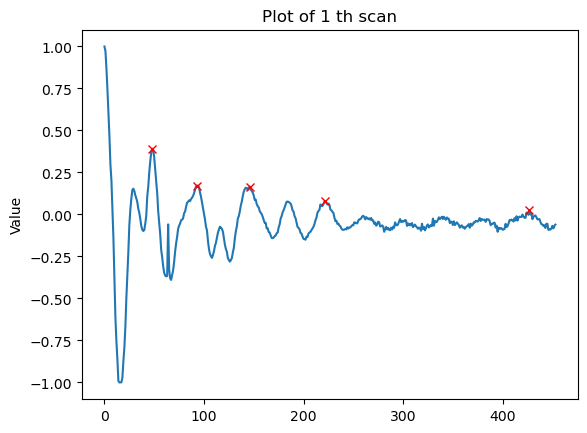

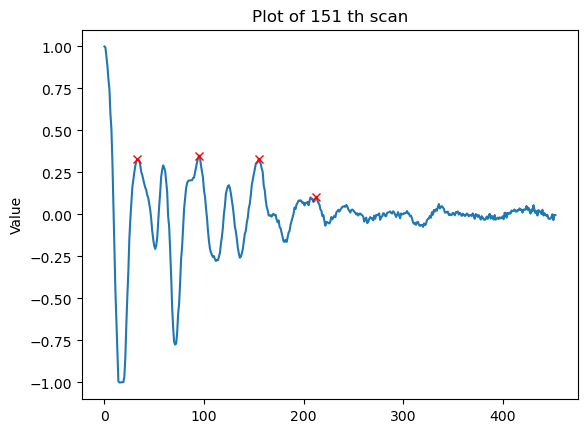

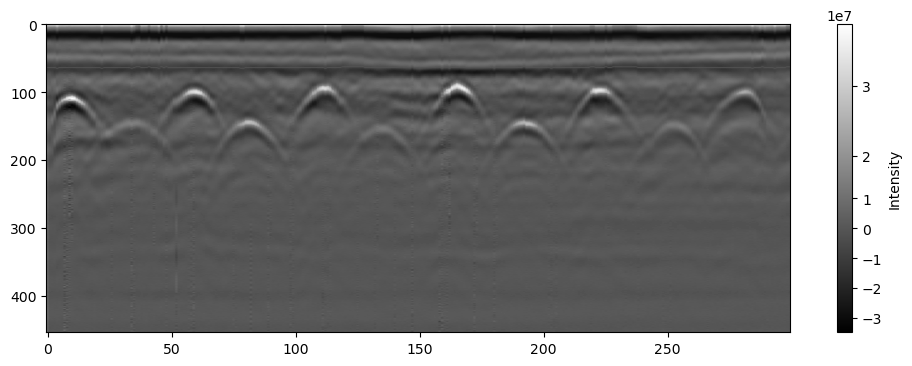

In [13]:
# Plot A-scans and B-scan of the time-zeroed data
gpr_lr.plot.Plot_a_scan(time0df)
gpr_lr.plot.Plot_b_scan_advanced(time0df, 0.7)

In [14]:
# Migration
migrated_df, profilePos, dt, dx, velocity = gpr_lr.FK_migration(time0df, rhf_spm, rhf_sps, rhf_position, rhf_range, rh_nsamp, rhf_espr=11)

512it [00:00, 30884.38it/s]


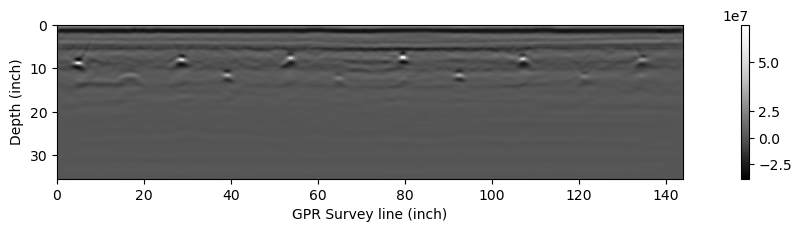

In [15]:
# Plot migrated data
gpr_lr.plot.Plot_migrated_advanced(migrated_df, profilePos, rhf_depth, rh_nsamp, 0.7)

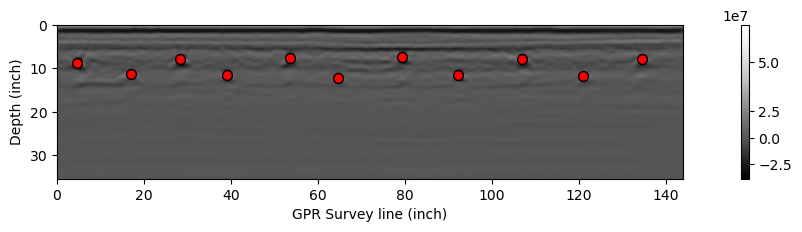

In [16]:
# Locate rebar configuration based on the migration result
gpr_lr.Locate_rebar(migrated_df, rhf_depth, rh_nsamp, profilePos = profilePos, amplitude_threshold = 0.50, depth_threshold=0.20, num_clusters=11, midpoint_factor=0.7)